# Ex4 - Linear Regression

**Group Names:** Michael Jakober, Cyril Winkler, Jaron Matzinger, Maurice Salzmann

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [2]:
datafile = "lausanne-appart.csv"

Read the data

In [3]:
dataset = pd.read_csv(datafile)

Display first rows

In [4]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [5]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

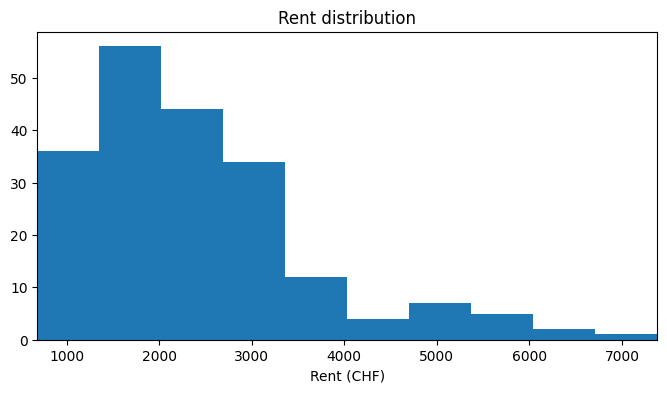

In [6]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

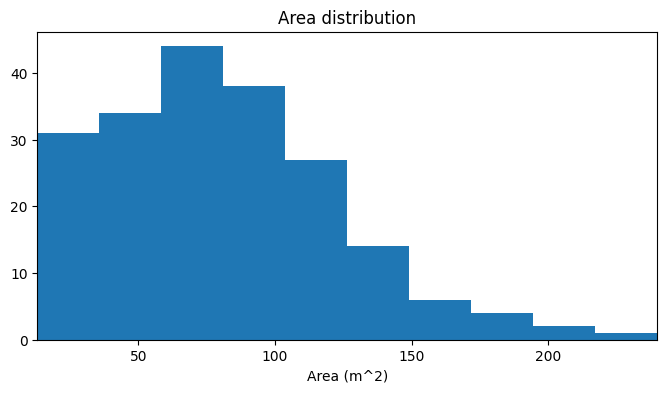

In [7]:
plt.figure(1, figsize=(8, 4))
plt.hist(living_area)
plt.xlabel("Area (m^2)")
plt.title("Area distribution")
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

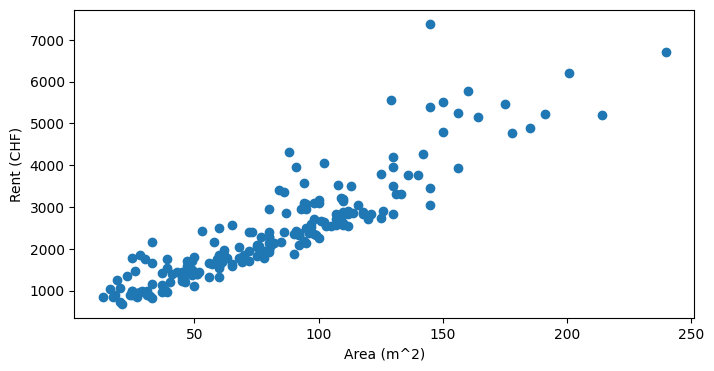

In [8]:
plt.figure(1, figsize=(8,4))
plt.scatter(x=living_area, y=rent_price)
plt.xlabel('Area (m^2)')
plt.ylabel('Rent (CHF)')
plt.show()

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of Part 1.

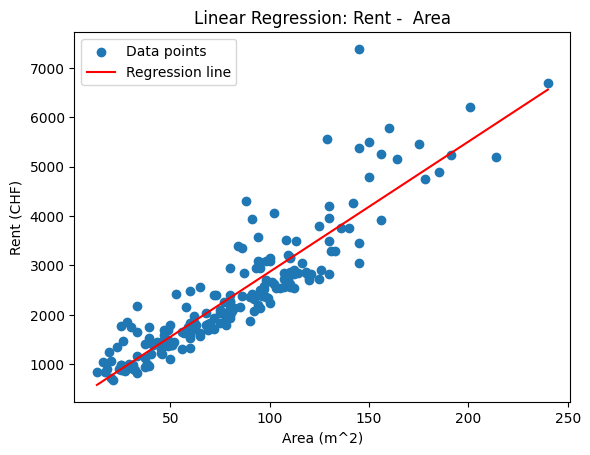

In [9]:
#######################################################################
# TODO:                                                               #
# Perform the following computation                                   #
#  - get N, the number of samples                                     #
#  - compose X with the 1st column full of 1.0 and the 2nd column     #
#    with the living area (hint: have a look to np.ones() and         #
#    np.column_stack()                                                #
#  - get y as the rent prices                                         #
#  - compute the theta (hint: matrix A to matrix B multiplication can #
#    be done with A.dot(B))                                           #
#  - plot the line (hint: compute a set of x points linearly spaced   #
#    and, with the thetas, compute the corresponding y values)        #
#######################################################################

N = len(rent_price)

X = np.column_stack((np.ones(N), living_area))
y = rent_price

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

x_points = np.linspace(min(living_area), max(living_area), 100)
y_points = theta[0] + theta[1] * x_points

plt.scatter(living_area, rent_price, label='Data points')

# Plot the regression line
plt.plot(x_points, y_points, color='red', label='Regression line')

# Labels and title
plt.xlabel('Area (m^2)')
plt.ylabel('Rent (CHF)')
plt.title('Linear Regression: Rent -  Area')
plt.legend()
plt.show()

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

b) Compute the MSE loss according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [10]:
#######################################################################
# TODO:                                                               #
#  - define a function h_theta(x, theta_0, theta_1) to compute the    #
#    the hypothesised values of y (the "y_hat")                       #
#  - define a function mse_loss(x, y, y_hat)                          #
#  - use both functions to compute the MSE loss on the dataset        #
#######################################################################

def h_theta(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

def mse_loss(x, y, y_hat):
    return (1 / 2*len(x)) * np.sum((y_hat - y) ** 2)

y_hat = h_theta(living_area, theta[0], theta[1])

mse = mse_loss(X, y, y_hat)
print(f'MSE Loss: {mse}')

MSE Loss: 5576750329.991914


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

In [11]:
import torch

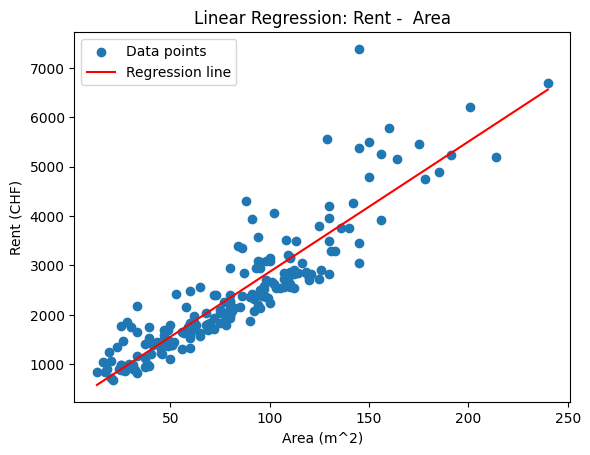

In [12]:
#######################################################################
# TODO:                                                               #
# Perform the following computation                                   #
#  - in a similar way as in the previous part 2, compute theta0 and   #
#    theta1, plot the computed line                                   #
#  - compute the loss J with these new values of theta0 and theta1,   #
#    for that you may use mse_loss() function defined abouve          #
#######################################################################
living_area_torch = torch.tensor(living_area, dtype=torch.float32)
rent_price_torch = torch.tensor(rent_price, dtype=torch.float32)

N = len(rent_price_torch)

X = torch.cat((torch.ones(N, 1), living_area_torch.view(-1, 1)), dim=1)
y = rent_price_torch

theta = torch.inverse(X.T @ X) @ X.T @ y

x_points = torch.linspace(min(living_area_torch), max(living_area_torch), 100)
y_points = theta[0] + theta[1] * x_points

plt.scatter(living_area_torch.numpy(), rent_price_torch.numpy(), label='Data points')

plt.plot(x_points.numpy(), y_points.numpy(), color='red', label='Regression line')

# Labels and title
plt.xlabel('Area (m^2)')
plt.ylabel('Rent (CHF)')
plt.title('Linear Regression: Rent -  Area')
plt.legend()
plt.show()

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

In [13]:
def h_theta(x, theta):
    return theta[0] + theta[1] * x

def mse_loss(x, y, y_hat):
    return (1 / (2 * len(x))) * torch.sum((y_hat - y) ** 2)

y_hat = h_theta(living_area_torch, theta)

mse = mse_loss(X, y, y_hat)
print(f'MSE Loss: {mse}')

MSE Loss: 138034.953125
